In [1]:
import os
import cv2
import numpy as np
import time
from fitter import Fitter

from skimage import color

def getavgstd(image):
    avg = []
    std = []
    image_avg_h = np.mean(image[:, :, 0])
    image_std_h = np.std(image[:, :, 0])
    image_avg_e = np.mean(image[:, :, 1])
    image_std_e = np.std(image[:, :, 1])
    image_avg_d = np.mean(image[:, :, 2])
    image_std_d = np.std(image[:, :, 2])
    avg.append(image_avg_h)
    avg.append(image_avg_e)
    avg.append(image_avg_d)
    std.append(image_std_h)
    std.append(image_std_e)
    std.append(image_std_d)
    return (avg, std)


path_dataset = '/root/autodl-tmp/BACH/standard/train'

# path_

hedH_avg_List = []
hedE_avg_List = []
hedD_avg_List = []
hedH_std_List = []
hedE_std_List = []
hedD_std_List = []

t1 = time.time()
for class_dir in os.listdir(path_dataset):
    path_class = os.path.join(path_dataset,class_dir)
    print(path_class)
    for image in os.listdir(path_class):
        path_img = os.path.join(path_class,image)
        img = cv2.imread(path_img)
        # print(img) #None
        try:
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
            img = color.rgb2hed(img)
            img_avg, img_std = getavgstd(img)
        except:
            continue
            print(path_img)
        hedH_avg_List.append(img_avg[0])
        hedE_avg_List.append(img_avg[1])
        hedD_avg_List.append(img_avg[2])
        hedH_std_List.append(img_std[0])
        hedE_std_List.append(img_std[1])
        hedD_std_List.append(img_std[2])

t2 = time.time()
print(t2-t1)
#     break

/root/autodl-tmp/BACH/standard/train/Benign
/root/autodl-tmp/BACH/standard/train/Invasive
/root/autodl-tmp/BACH/standard/train/Normal
/root/autodl-tmp/BACH/standard/train/InSitu
2158.9909596443176


### 各维相关性分析

In [2]:
'''
初步归纳：A和B的mean极强相关
A和L的mean强相关性
A和L的std极强相关
A和B和L的std强相关
所以基本可以发现，不是完全独立的，所以搜索空间有些意义不大，可以进一步简化

试一下三维正态分布（因为确实各维都是有关的）
'''

import numpy as np
all = [hedH_avg_List, hedE_avg_List, hedD_avg_List, hedH_std_List, hedE_std_List, hedD_std_List]
all_str = ['hedH_avg_List', 'hedE_avg_List', 'hedD_avg_List', 'hedH_std_List', 'hedE_std_List', 'hedD_std_List']
for i in range(6):
    X = all[i]
    X_str = all_str[i]
    for j in range(6):
        if i == j :
            continue
        Y = all[j]
        Y_str = all_str[j]
        result = np.corrcoef(X, Y)
        print(X_str,' and ', Y_str, 'cor:')
        print(result)
        print('\n')
# X = labA_avg_List
# Y = labB_avg_List
# result1 = np.corrcoef(X, Y)
# print(result1)

hedH_avg_List  and  hedE_avg_List cor:
[[1.         0.81723012]
 [0.81723012 1.        ]]


hedH_avg_List  and  hedD_avg_List cor:
[[1.         0.54766385]
 [0.54766385 1.        ]]


hedH_avg_List  and  hedH_std_List cor:
[[1.         0.85786112]
 [0.85786112 1.        ]]


hedH_avg_List  and  hedE_std_List cor:
[[1.         0.64428264]
 [0.64428264 1.        ]]


hedH_avg_List  and  hedD_std_List cor:
[[1.         0.73286835]
 [0.73286835 1.        ]]


hedE_avg_List  and  hedH_avg_List cor:
[[1.         0.81723012]
 [0.81723012 1.        ]]


hedE_avg_List  and  hedD_avg_List cor:
[[1.         0.65780174]
 [0.65780174 1.        ]]


hedE_avg_List  and  hedH_std_List cor:
[[1.         0.66350634]
 [0.66350634 1.        ]]


hedE_avg_List  and  hedE_std_List cor:
[[1.         0.70896284]
 [0.70896284 1.        ]]


hedE_avg_List  and  hedD_std_List cor:
[[1.        0.7357344]
 [0.7357344 1.       ]]


hedD_avg_List  and  hedH_avg_List cor:
[[1.         0.54766385]
 [0.54766385 1.     

In [9]:
hedH_avg_List[:10]

[0.07767432889700265,
 0.03499488412296593,
 0.02447049009200667,
 0.021580533468925824,
 0.14042860194618897,
 0.02328905677687312,
 0.029375580060553307,
 0.03432059471529602,
 0.01839754480719376,
 0.028223922242405483]

{'norm': {'loc': -0.5628006204773469, 'scale': 0.018145701717805107}}

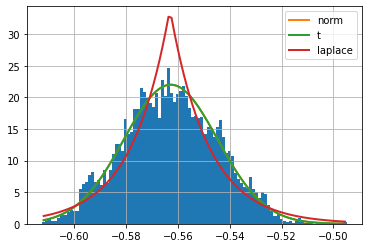

In [2]:
f = Fitter(hedH_avg_List, distributions=['norm', 't', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.011215876746058694, 'scale': 0.003166778261506521}}

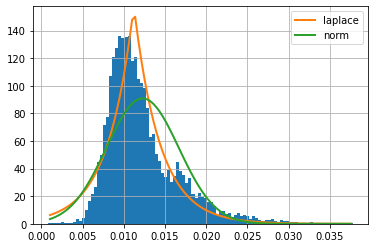

In [10]:
f = Fitter(hedH_std_List, distributions=['norm', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 0.193370794053575, 'scale': 0.015045569517902287}}

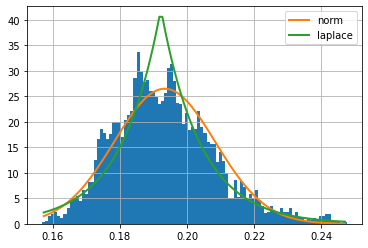

In [9]:
f = Fitter(hedE_avg_List, distributions=['norm','laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': 0.010150992857230454, 'scale': 0.003069532936502699}}

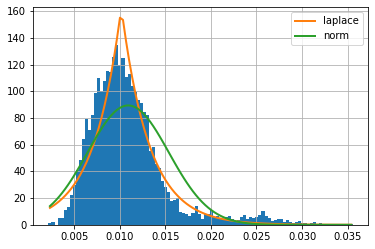

In [8]:
f = Fitter(hedE_std_List, distributions=['norm',  'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'laplace': {'loc': -0.37009329746981023, 'scale': 0.010933929591337748}}

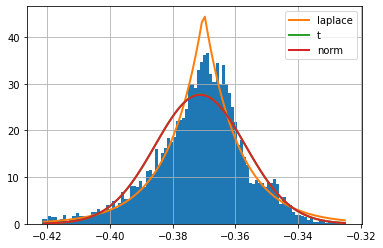

In [6]:
f = Fitter(hedD_avg_List, distributions=['norm', 't', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')

{'norm': {'loc': 0.02664050451080056, 'scale': 0.009455237495936302}}

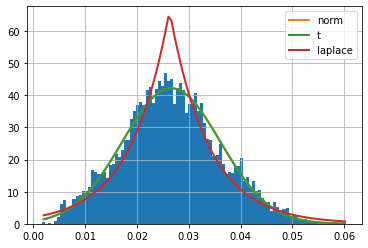

In [7]:
f = Fitter(hedD_std_List, distributions=['norm', 't', 'laplace'])
f.fit()
f.summary()
f.get_best(method='sumsquare_error')